                                                                                                         Saurabh Bajoria
                                                                                                         UBid: sbajoria
                                                                                                         Person no:50208005

**CSE 4/587 Data Intensive Computing**
====================
***LAB2: DATA CLEANING AND MUNGING***
---------------------------------------
                                                                                                       

*Activity 3: Convert and Transform Raw Data*
--------------------------------------

*JUNE 10-JULY 12, 2015 – GAMING, JOBS AND BROADBAND*


- Note:
 1. Used read.csv.sql() function to read the data from CSV provided
 2. Also, used CASE WHEN..THEN END to look up values from Questionnaire and change the digits from CSV to their respective values
 3. Grouped the ages into 4 parts
 4. Developed questions and related hypothesis
 5. Plotted graphs against the data fetched and came to a conclusion about the same

 

- Importing Libraries required

In [1]:
library(dplyr)
library(sqldf)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'sqldf' was built under R version 3.3.3"Loading required package: gsubfn
Loading required package: proto
Could not load tcltk.  Will use slower R code instead.
Loading required package: RSQLite


**Question 1:** How does the frequency of using internet vary with the community size and age?


**Hypothesis:** The frequency of internet users should be the highest in the Suburban areas followed by Urban and Rural areas. Also, old age people use the internet very rarely, i.e. several times a week or once a week.

- For analyzing this, I have grouped the ages in 4 parts, 18-30, 30-50, 50-70 and 70-100
- Also, I have looked up the values for digits in the questionnaire and replaced them

In [2]:
dataframe1<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select  CASE WHEN intfreq='1' THEN 'Almost Constantly'
     WHEN intfreq='2' THEN 'Several times a day'
     WHEN intfreq='3' THEN 'About once a week'
     WHEN intfreq='4' THEN 'Several times a week'
     WHEN intfreq='5' THEN 'Less Often'
     WHEN intfreq='8' THEN 'Dont know'
     WHEN intfreq='9' THEN 'Refused'
     ELSE 'Dont use Internet' 
END as 'InternetUsageFrequency',
CASE WHEN usr='U' THEN 'Urban'
     WHEN usr='S' THEN 'Suburban'
     WHEN usr='R' THEN 'Rural'
     ELSE '' 
END as 'Community',
CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100'
END as 'age' from file",
eol="\n")

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

- Plot the above dataframe using qplot and type Jitter
- X-axis: Community -- Urban, Rural, Suburban
- Y-axis: InternetUsageFrequency -- Almost Constantly,Several times a day,About once a week, Several times a week, Less Often, Dont know, Refused, Dont use Internet
- Colour: Age -- 8-30, 30-50, 50-70, 70-100
- Used scale_x_discrete and scale_y_discrete to add specific values to the X and Y axis respectively.

Warning message:
"closing unused connection 5 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

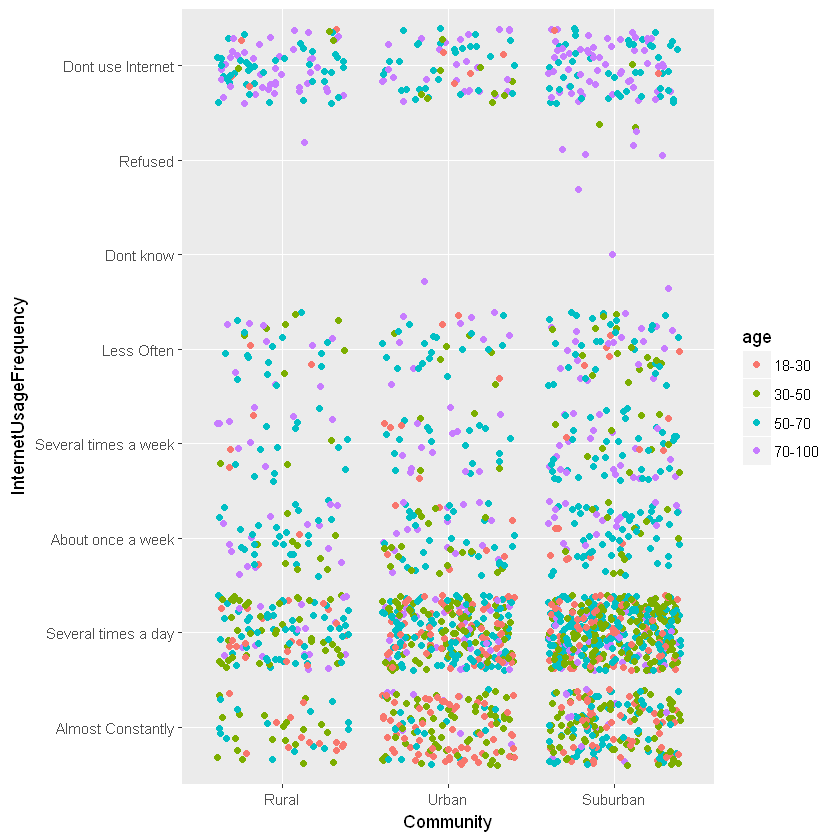

In [3]:
qplot(Community, InternetUsageFrequency, colour = age, data=dataframe1, geom="jitter")+scale_y_discrete(limits=c("Almost Constantly","Several times a day","About once a week"
 , "Several times a week", "Less Often", "Dont know","Refused", "Dont use Internet" )) +scale_x_discrete(limits=c("Rural","Urban","Suburban"))

**Conclusion:** As seen from the plot above, dense clustering of points in the subarban part proves our hypothesis that  people in suburban region are frequent users of internet.

Also, the number of purple and Turquoise points are more in the 'Dont use internet', 'Less often' and 'About once a week'. This claims that the people with age more than 50 years are less frequent users of Internet.

**Question 2:** How does the subscription to High speed internet depends on the Total Family income?


**Hypothesis:** High Speed Internet subcription should be more in the families with high total family income and less in the families with less family income.

- I have looked up the values for digits in the questionnaire and replaced them
- Also, counted the number of users who have High Speed Internet and grouped them by income

In [4]:
dataframe2<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select Income, count(1) as 'CountOfUsers' from (select  CASE  WHEN BBHOME1='2' THEN 'Yes'
     WHEN BBHOME1='3' THEN 'Yes'
     ELSE 'No' 
END as 'HighSpeedInternet',
CASE WHEN inc='1' THEN 'Less than $10000'
     WHEN inc='2' THEN '$10000 - $20000'
     WHEN inc='3' THEN '$20000 - $30000'
     WHEN inc='4' THEN '$30000 - $40000'
     WHEN inc='5' THEN '$40000 - $50000'
     WHEN inc='6' THEN '$50000 - $75000'
     WHEN inc='7' THEN '$75000 - $100000'
     WHEN inc='8' THEN '$100000 - $150000'
     WHEN inc='9' THEN 'More than $150000'
END as 'Income' from file) where HighSpeedInternet='Yes' group by Income",
eol="\n")

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

- Plot the above dataframe using ggplot and geom_density
- X-axis: Income -- Less than $10000, $10000 - $20000,$20000 - $30000, $30000 - $40000,$40000 - $50000,$50000 - $75000,$75000 - $100000,$100000 - $150000,More than $150000
- Y-axis: CountOfUsers 
- Used theme to change the font of the values on both the axes
- Used scale_x_discrete to add specific values to the X axis

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

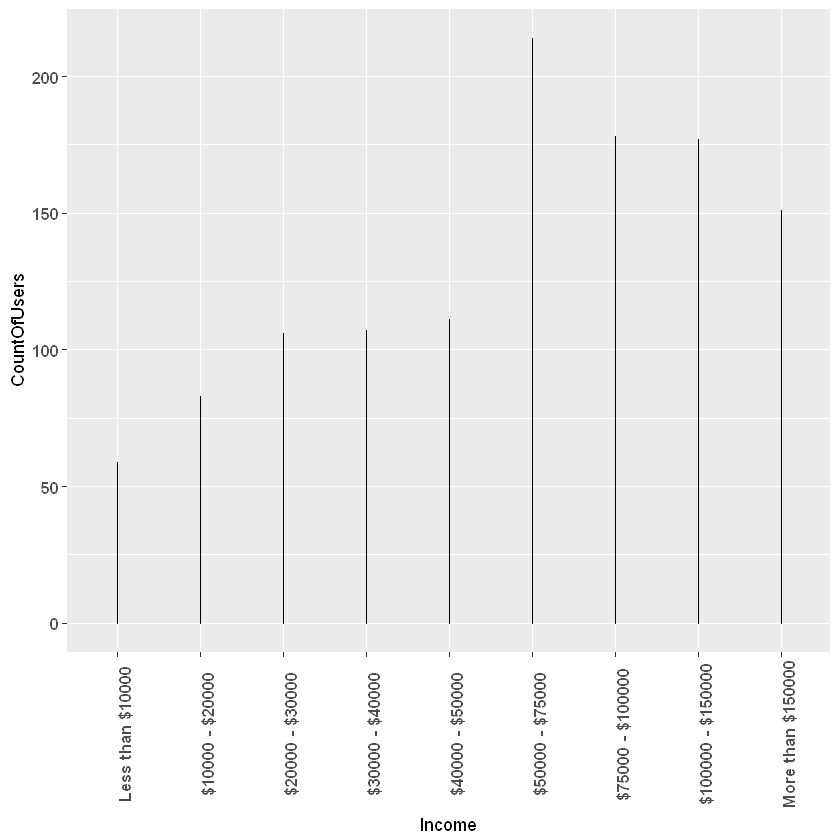

In [5]:
ggplot(data=dataframe2, aes(x=Income, y=CountOfUsers))+geom_density() +theme(axis.text.x = element_text(face="bold",size=10, angle=90),
          axis.text.y = element_text(face="bold", size=10))+scale_x_discrete(limits=c("Less than $10000", "$10000 - $20000","$20000 - $30000",
                                                   "$30000 - $40000","$40000 - $50000","$50000 - $75000","$75000 - $100000",
                                                   "$100000 - $150000","More than $150000"))

**Conclusion:** As seen above, higher lines on the '$50000 - $75000', '$75000 - $100000', '$100000 - $150000' and 'More than $150000' part proves that people with high family income have more connections to high speed internet as compared to people with low family income.

**Question 3:** How does the usage of cellphone vary with age?


**Hypothesis:** Primary usage of cellphones vary with age group. People with age group 18-30 or 30-50 use the cellphones primarily for listening to music and watching movies online, whereas people in age group 50-70 or 70-100 use the cellphones primarily for Sports or Navigation.

- For analyzing this, I have grouped the ages in 4 parts, 18-30, 30-50, 50-70 and 70-100
- Counted the positive reponses for different categories(usage of cell phones) individually and grouped them on basis of age groups
- Merged the counts on basis of age groups

In [6]:
dataframe3<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
sql="select CASE when a.age='30-50' then 2
when a.age='50-70' then 3
when a.age='70-100' then 4
when a.age='18-30' then 1
else 0
end as age, a.videoChat, b.OnlineShoppng,c.Navigation,d.Sports,e.OnlineMovies,f.OnlineMusic from
    (select age,count(q5a) as 'videoChat' from (Select CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100'
     END as 'age', q5a from file where q5a=1) group by age) as 'a' inner join 
    (select age,count(q5b) as 'OnlineShoppng' from (Select CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100' 
     END as 'age', q5b from file where q5b=1) group by age) as 'b' on a.age=b.age inner join 
    (select age,count(q5c) as 'Navigation' from (Select CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100'
     END as 'age', q5c from file where q5c=1) group by age) as 'c' on b.age=c.age inner join
    (select age,count(q5d) as 'Sports' from (Select CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100' 
     END as 'age', q5d from file where q5d=1) group by age) as 'd' on c.age=d.age inner join
    (select age,count(q5e) as 'OnlineMovies' from (Select CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100' 
     END as 'age', q5e from file where q5e=1) group by age) as 'e' on d.age=e.age inner join
    (select age,count(q5f) as 'OnlineMusic' from (Select CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100'
     END as 'age', q5f from file where q5f=1) group by age) as 'f' on e.age=f.age
",eol="\n")

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

- Plot the above dataframe using ggplot and geom_line
- X-axis: Age -- 8-30, 30-50, 50-70, 70-100
- Y-axis: Count
- Series: videoChat , OnlineShopping, Sports, OnlineMovies, OnlineMusic, Navigation
- Used scale_x_discrete to add specific values to the X axis

Warning message:
"closing unused connection 6 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"Warning message:
"closing unused connection 5 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

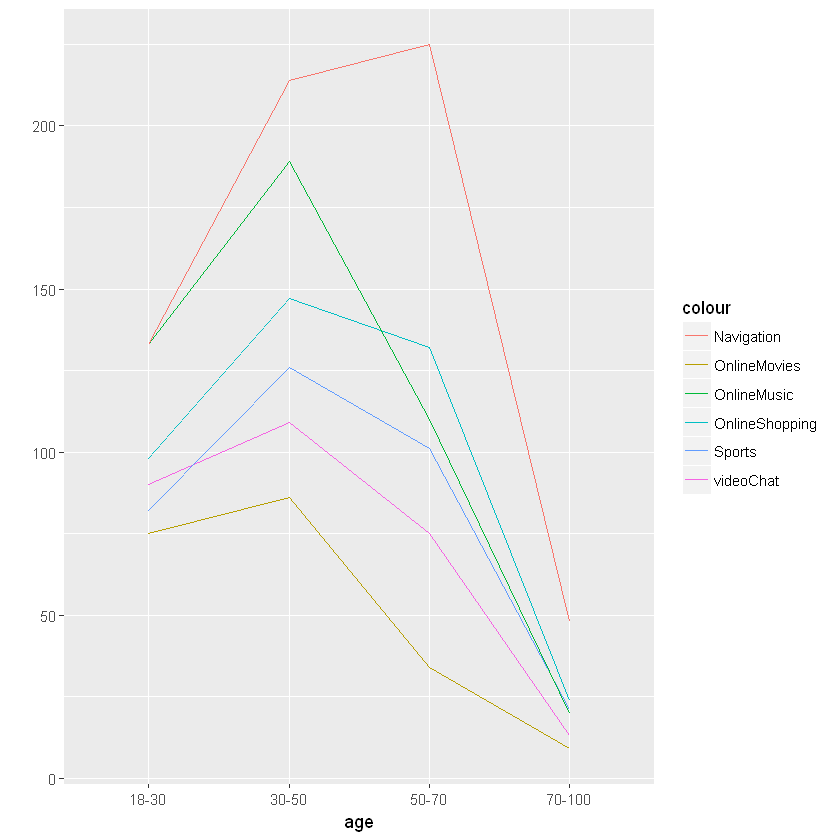

In [7]:
ggplot(data = dataframe3, aes(x = age)) + scale_x_discrete(limits=c("18-30","30-50","50-70","70-100"))+
  geom_line(aes(y = videoChat,colour="videoChat"))+
    geom_line(aes(y = Sports,colour="Sports"))+
geom_line(aes(y = OnlineShoppng,colour="OnlineShopping"))+
geom_line(aes(y = OnlineMovies,colour="OnlineMovies"))+
geom_line(aes(y = OnlineMusic,colour="OnlineMusic"))+
geom_line(aes(y = Navigation,colour="Navigation"))+
  labs(y = "")

**Conclusion:** As per the graph above, people from all the age groups use the phone for Navigation

Apart from that, the usage varies with different age group. For example, people in age group 30-50 use the cell phones for listening to music and watching movies whereas people in age group 50-70 use the cellphones for online shopping and so on.

**Question 4:** How was the participation among age categories in playing games on Computer or Mobile phones?

**Hypothesis**: Most people who play games should be in the age group 18-30

- Grouped the age into 4 parts
- Counted the positive reponses for 'Play games' and grouped them using age

In [8]:
dataframe4<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select age,count(1) as 'count' from (select CASE WHEN game1='1' THEN 'Yes'
     WHEN game1='2' THEN 'No'
    ELSE '' 
    END as 'PlayGames',
    CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100'
     ELSE 'NA' 
     END as 'age' from file) where PlayGames='Yes' group by age",
eol="\n")

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

- Plot the above dataframe using ggplot and geom_density
- X-axis: Age -- 8-30, 30-50, 50-70, 70-100
- Y-axis: Count
- Used theme to change the font of values at X and Y axes

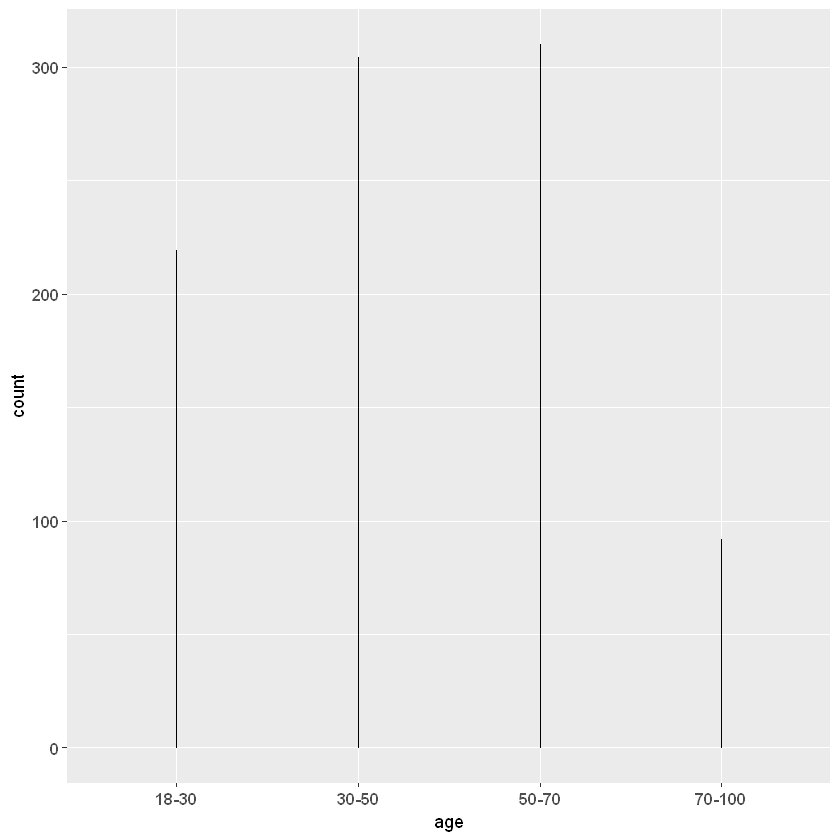

In [9]:
ggplot(data=dataframe4, aes(x=age, y=count))+geom_density() +theme(axis.text.x = element_text(face="bold",size=10),
          axis.text.y = element_text(face="bold", size=10))

**Conclusion:** Surprisingly, the data shows that the people who play the games most lie under the age group 30-50 and 50-70

**Question 5:** How does the smart phone ownership vary with community size and age group?

**Hypothesis:** People in the age group 18-30 and 30-50 are more likely to own a smart phone whereas people in the older age groups are not. Also, a lot people in suburban and urban regions have high changes of owning a phone (smart or not) as compared to people in rural region.

- Grouped age into 4 parts
- If a user holds a phone, then checked if he/she has a smartphone
- Otherwise, no cell phones

In [10]:
dataframe5<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select  CASE WHEN device1a=1 and smart1='1' THEN 'Yes,smartphone'
     WHEN device1a=1 and smart1='2' THEN 'No,not a smartphone'
     WHEN device1a=2 THEN 'No cell phones'
     ELSE 'Refused to ans/Dont know' 
END as 'SmartPhoneOwnership',
CASE WHEN usr='U' THEN 'Urban'
     WHEN usr='S' THEN 'Suburban'
     WHEN usr='R' THEN 'Rural'
END as 'Community',
CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100'
END as 'age' from file",
eol="\n")

- Plot the above dataframe using qplot and type Jitter
- X-axis: Community -- Urban, Rural, Suburban
- Y-axis: SmartPhoneOwnership -- Yes,smartphone,No,not a smartphone, No cell phones
- Colour: Age -- 8-30, 30-50, 50-70, 70-100
- Used scale_x_discrete and scale_y_discrete to add specific values to the X and Y axis respectively.

Warning message:
"closing unused connection 6 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"Warning message:
"Removed 1336 rows containing missing values (geom_point)."

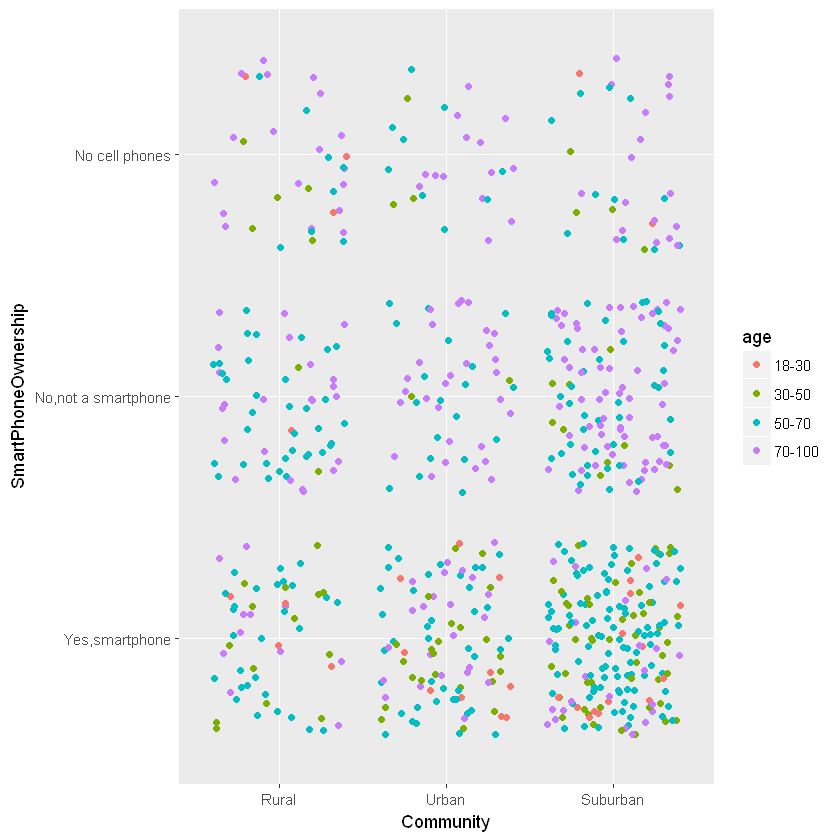

In [11]:
qplot(Community, SmartPhoneOwnership, colour = age, data=dataframe5, geom="jitter")+scale_y_discrete(limits=c("Yes,smartphone","No,not a smartphone","No cell phones")) +scale_x_discrete(limits=c("Rural","Urban","Suburban"))

**Conclusion:** Dense clustering in the *'Suburban'-'Yes,smartphone'* and *'Suburban'-'No,not a smartphone'* area shows that people in Suburban region are more likely to own a phone (smart or not) as compared to people in Urban to rural areas.
Also, the colour of points under *'No, not a smartphone'* and *'No cell phones'* are mostly turquoise and purple. This shows that many people in age group *'50-70'* and *'70-100'* either dont own a smart phone or not a phone at all.

Density of users with Phones(smart/not smart) according to Community:  Suburban --> Urban --> Rural

Density of users with Phones(smart/not smart) according to Age:   50-70 --> 70-100--> 30-50 --> 18-30

**Question 6:** How does the total family income change according to the employment type and age?

**Hypothesis:** In general, people with Part-time employment will have a lower total family income whereas the people with full-time employment and businessman will have income on the higher side.

Also, people age under 30 will mostly be involved in part time jobs, i.e. working alongside studying.

- Grouped age into 4 parts
- Considered only if the employment type is Full time, Part time or business

In [12]:
dataframe6<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select  CASE WHEN EMPLNW=1  THEN 'Employed full-time'
     WHEN EMPLNW=2 THEN 'Employed part-time'
     WHEN EMPLNW=5 THEN 'Have own business/self-employed'
END as 'EmploymentType',
CASE WHEN inc='1' THEN 'Less than $10000'
     WHEN inc='2' THEN '$10000 - $20000'
     WHEN inc='3' THEN '$20000 - $30000'
     WHEN inc='4' THEN '$30000 - $40000'
     WHEN inc='5' THEN '$40000 - $50000'
     WHEN inc='6' THEN '$50000 - $75000'
     WHEN inc='7' THEN '$75000 - $100000'
     WHEN inc='8' THEN '$100000 - $150000'
     WHEN inc='9' THEN 'More than $150000'
     ELSE 'NA' 
END as 'Income',
CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100'
     ELSE 'NA' 
END as 'age' from file where EMPLNW in (1,2,5)",
eol="\n")

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

- Plot the above dataframe using qplot and type Jitter
- X-axis: Age -- 8-30, 30-50, 50-70, 70-100
- Y-axis: Income -- Less than $10000, $10000 - $20000,$20000 - $30000, $30000 - $40000,$40000 - $50000,$50000 - $75000,$75000 - $100000,$100000 - $150000,More than $150000
- Colour: EmploymentType -- Full Time,Part time, Business
- Used scale_y_discrete to add specific values to the Y axis 

Warning message:
"Removed 113 rows containing missing values (geom_point)."

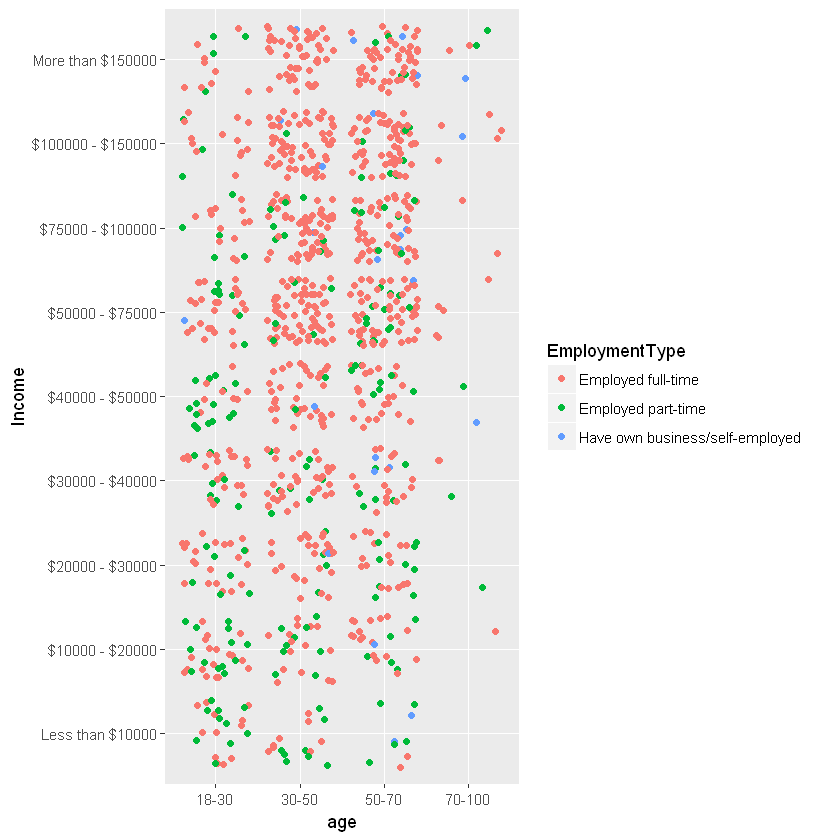

In [13]:
qplot(age, Income, colour = EmploymentType, data=dataframe6, geom="jitter")+scale_y_discrete(limits=c("Less than $10000", "$10000 - $20000","$20000 - $30000",
                                                   "$30000 - $40000","$40000 - $50000","$50000 - $75000","$75000 - $100000",
                                                   "$100000 - $150000","More than $150000"))

**Question 7:** What percentage of people who use Dating App/Site think it is good way to meet people and it helps you meet more people?

- Column Date1a gives the number of people using Dating Site and Column Date2a gives the number of people using Dating App
- Column Date4a gives the number of people who think dating apps/sites are good way to meet people
- Column Date4b gives the number of people who think datingm apps/sites help them meet more people
- To answer the question, we need to calculate the total number of people who have positive responses for both column Date4a and Date4b and divide by the total number of users for dating app/site

In [14]:
read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select (HappyUsers*100/TotalUsers) as Percentage from 
(select sum(CASE WHEN date1a=1 or date2a=1 then 1 end) as TotalUsers,
                    sum(CASE WHEN date4a=1 and date4b=1 then 1 end) as HappyUsers  from file where date1a=1 or date2a=1)")

Percentage
55


**Answer:** 55% of the people who use dating app/site think that it is a good way to meet people and it helps meet more people